C:\Users\Ceren\AppData\Local\Temp\ipykernel_25328\1991155012.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_dengeli = df.groupby("Cover_Type", group_keys=False).apply(lambda x: x.sample(n=n, random_state=42))


Random Forest Test Doğruluk: % 85.78
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       549
           1       0.79      0.66      0.72       549
           2       0.86      0.81      0.83       549
           3       0.92      0.98      0.95       550
           4       0.88      0.95      0.92       550
           5       0.83      0.87      0.85       549
           6       0.94      0.96      0.95       550

    accuracy                           0.86      3846
   macro avg       0.86      0.86      0.86      3846
weighted avg       0.86      0.86      0.86      3846



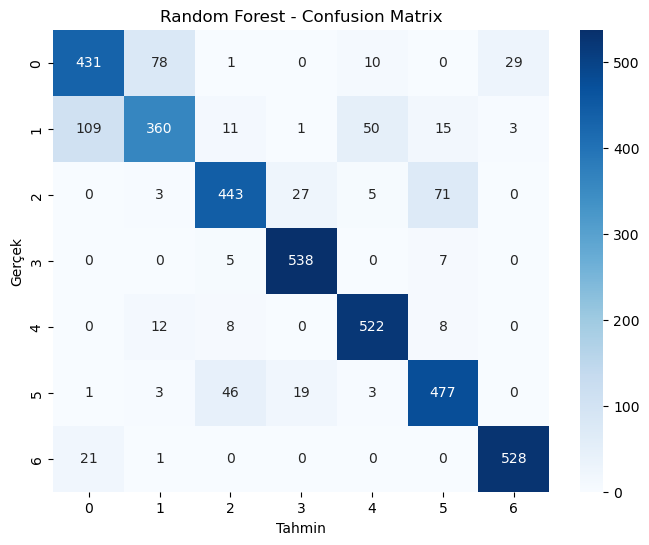

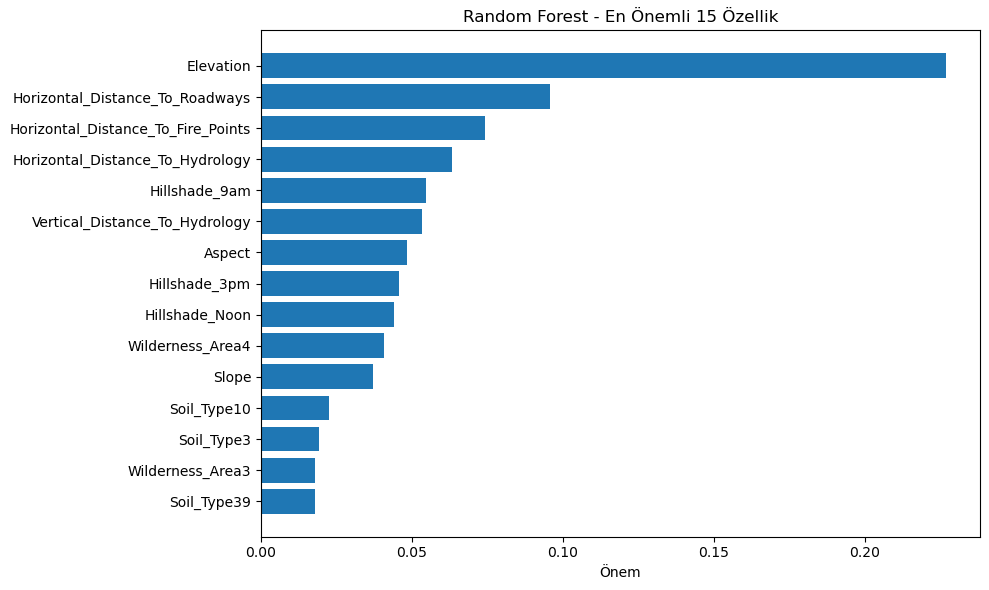

In [3]:
# Forest Cover Type - DENGELİ RANDOM FOREST

import pandas as pd  # Pandas: veri okuma, işleme ve tablo (DataFrame) yönetimi için kullanılır
import numpy as np   # Numpy: sayısal işlemler, array ve matematiksel fonksiyonlar için kullanılır
from sklearn.model_selection import train_test_split  # Eğitim ve test setlerine ayırmak için
from sklearn.ensemble import RandomForestClassifier   # Random Forest algoritmasını (ansambl/ensemble) çağırmak için
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Model performans ölçümü için metrikler
import matplotlib.pyplot as plt   # Grafik çizmek için (temel)
import seaborn as sns            # İleri seviye görseller, özellikle ısı haritası (heatmap) için

# 1. Veri yükle
df = pd.read_csv("covtype.csv")  # Klasördeki 'covtype.csv' dosyasını oku, DataFrame'e yükle.
# Tüm veri 'df' içinde tutulur. Satırlar örnekler, sütunlar özellikler ve hedef değişkendir.

# 2. Dengeli örnekleme: her sınıftan eşit satır al
n = df["Cover_Type"].value_counts().min()  
# Her sınıfın ('Cover_Type') kaç örneği olduğuna bakar, en az olanın sayısını 'n' olarak alır.
# Amaç: Her sınıftan eşit sayıda örnek alıp, dengesizliği (class imbalance) yok etmek.

df_dengeli = df.groupby("Cover_Type", group_keys=False).apply(lambda x: x.sample(n=n, random_state=42))
# Veriyi 'Cover_Type' değerine göre gruplar.
# Her gruptan (yani her sınıftan) 'n' kadar satırı rastgele alır. 
# random_state=42 yazmak: Her seferinde aynı veriyi seçmesi için (sonuçlar tekrarlanabilir).
# Sonuç: Tüm sınıflar eşit sayıda, yani tamamen dengeli bir veri seti!

X = df_dengeli.drop("Cover_Type", axis=1)  
# Tahmin etmeye çalışacağımız (target) sütunu veri setinden çıkarıyoruz.
# X artık sadece giriş özelliklerinden oluşan (input features) veri.

y = df_dengeli["Cover_Type"] - 1  # Sıfırdan başlat
# 'Cover_Type' genellikle 1'den başlar, ama Python ve sklearn 0'dan başlatmayı sever.
# 1 çıkartıp 0, 1, 2... gibi indexliyoruz. Bu hatasız ve standart analiz için önemli.

# 3. Eğitim/Test ayır
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Veri setini %80 eğitim, %20 test olarak bölüyoruz.
# random_state=42: Yine rastgelelik aynı olsun, tekrarlanabilirlik.
# stratify=y: Her iki setin de sınıf dağılımı eşit kalsın (özellikle dengesiz veri için şart).

# 4. Model
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
# RandomForest modeli oluşturuyoruz. 
# n_estimators=100: 100 tane karar ağacı oluştur (forest büyüklüğü). Çoksa daha güçlü, azsa hızlı olur.
# n_jobs=-1: Tüm CPU çekirdeklerini kullan (eğitim süresi hızlanır).
# random_state=42: Tekrarlanabilirlik.

rf.fit(X_egitim, y_egitim)
# Modeli eğitim verisiyle eğitiyoruz. Model, veriye bakarak öğreniyor.

y_tahmin = rf.predict(X_test)
# Test verisiyle tahmin yapıyoruz. Model, görmediği veride ne kadar başarılı olacak göreceğiz.

# 5. Metrikler
dogruluk = accuracy_score(y_test, y_tahmin)
# Accuracy (doğruluk) = Kaç tanesini doğru bildi? Oran olarak hesaplanır.

cm = confusion_matrix(y_test, y_tahmin)
# Confusion matrix: Hangi sınıfı ne kadar doğru/yanlış tahmin ettik?
# Satır: gerçek sınıf, sütun: modelin tahmini. Diyagonal yüksekse iyidir.

print("Random Forest Test Doğruluk: %", round(dogruluk*100,2))
# Doğruluk yüzdesini ekrana basıyoruz. Yorumlarken: % kaç başarı?

print(classification_report(y_test, y_tahmin, zero_division=0))
# Her bir sınıf için precision (kesinlik), recall (duyarlılık), f1-score ve support'u verir.
# Sıfıra bölünme hatası olmaması için zero_division=0 eklenmiş (bazı sınıflarda tahmin hiç yoksa).

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
# confusion_matrix'i görselleştiriyoruz (heatmap ile).
# annot=True: Her kutucuğa sayıyı yaz.
# fmt='d': Tam sayı (decimal) formatı.
# cmap="Blues": Renk skalası. Koyu daha yüksek sayıyı gösterir.

plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()
# Matrisin başlığını ve eksen isimlerini yazdırıp, grafiği gösteriyoruz.

importances = rf.feature_importances_
# RandomForest'ın özelliklere verdiği önem skorlarını al.
# Hangi özellik/model girdisi sonucu daha çok etkiliyor, göreceğiz.

sorted_idx = np.argsort(importances)[::-1][:15]
# importances dizisini büyükten küçüğe sırala (np.argsort(...)[::-1]), ilk 15 tanesini seç.
# En önemli 15 özelliği göreceğiz.

plt.figure(figsize=(10,6))
plt.barh(X.columns[sorted_idx][::-1], importances[sorted_idx][::-1])
# Barh: Yatay çubuk grafiği (önemli özellikleri yukarıdan aşağıya gösterir).
# [::-1] ile en önemli yukarıda olacak şekilde sıraladık.

plt.xlabel("Önem")
plt.title("Random Forest - En Önemli 15 Özellik")
plt.tight_layout()
plt.show()
# Grafik başlığı, eksen adı ve grafiğin sığması için tight_layout. Sonra gösteriyoruz.

